<a href="https://colab.research.google.com/github/mirianbr/happiness-report/blob/main/world_happiness_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis - World Happiness Report

This notebook was created following an [AI inclusive YouTube live](https://www.youtube.com/watch?v=9irM_mwe7T0).

The dataset chosen by the event organizers was the [World Happiness Report](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021) - [detailed description](https://worldhappiness.report/ed/2021/). This year's edition of the report focuses on the impact of COVID-19 on happiness and mental health.

## Data dictionary

```
Country name: 
Regional indicator:
Ladder score:
Standard error of the ladder score:
upperwhisker:
lowerwhisker:
Logged GDP per capita:
Social support:
Healthy life expectancy:
Freedom to make life choices:
Generosity:
Perceptions of corruption:
Ladder score in Dystopia:
```

## Importing modules

In [ ]:
!pip install opendatasets
!pip install plotly

In [38]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.express as px

sns.set_style('darkgrid')

## Importing and reading data

In [ ]:
# Downloading dataset, using the kaggle.json API credentials
od.download('https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021')

In [6]:
# Reading data
df = pd.read_csv('world-happiness-report-2021/world-happiness-report-2021.csv')

## Preliminary data exploration

Number of lines and columns, null values. Also removing columns not to be used.

In [7]:
# First lines
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [8]:
# Dimensions
print('Dimensions:', df.shape[0], 'lines x', df.shape[1], 'columns')

Dimensions: 149 lines x 20 columns


In [9]:
# Data frame info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [10]:
# Data types count

df.dtypes.value_counts()

float64    18
object      2
dtype: int64

In [12]:
# Discarding some of the columns, to focus on the others

drop_list = ['Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 
             'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 
             'Explained by: Social support', 
             'Explained by: Healthy life expectancy', 
             'Explained by: Freedom to make life choices', 
             'Explained by: Generosity',
             'Explained by: Perceptions of corruption', 'Dystopia + residual']
df.drop(columns=drop_list, inplace=True)

In [13]:
# Basic stats for the remaining columns

df.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


In [15]:
# Are there null values in the dataset?

df.isna().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

## Data exploration

Asking questions about what the data means - countries, all the faces of happiness per country.

In [18]:
# Number of countries

df['Country name'].nunique()

149

In [19]:
# Which countries are they?

df['Country name'].unique()

array(['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Netherlands',
       'Norway', 'Sweden', 'Luxembourg', 'New Zealand', 'Austria',
       'Australia', 'Israel', 'Germany', 'Canada', 'Ireland',
       'Costa Rica', 'United Kingdom', 'Czech Republic', 'United States',
       'Belgium', 'France', 'Bahrain', 'Malta',
       'Taiwan Province of China', 'United Arab Emirates', 'Saudi Arabia',
       'Spain', 'Italy', 'Slovenia', 'Guatemala', 'Uruguay', 'Singapore',
       'Kosovo', 'Slovakia', 'Brazil', 'Mexico', 'Jamaica', 'Lithuania',
       'Cyprus', 'Estonia', 'Panama', 'Uzbekistan', 'Chile', 'Poland',
       'Kazakhstan', 'Romania', 'Kuwait', 'Serbia', 'El Salvador',
       'Mauritius', 'Latvia', 'Colombia', 'Hungary', 'Thailand',
       'Nicaragua', 'Japan', 'Argentina', 'Portugal', 'Honduras',
       'Croatia', 'Philippines', 'South Korea', 'Peru',
       'Bosnia and Herzegovina', 'Moldova', 'Ecuador', 'Kyrgyzstan',
       'Greece', 'Bolivia', 'Mongolia', 'Paraguay', 'Montenegro

In [20]:
# Finding Brazil

df[df['Country name'] == 'Brazil']

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
34,Brazil,Latin America and Caribbean,6.33,9.577,0.882,66.601,0.804,-0.071,0.756


In [21]:
# Listing regions

df['Regional indicator'].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

In [22]:
# Top 10 in ladder score

df[['Country name', 'Ladder score']].sort_values(by='Ladder score', ascending=False).head(10)

,Country name,Ladder score
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464
5,Norway,7.392
6,Sweden,7.363
7,Luxembourg,7.324
8,New Zealand,7.277
9,Austria,7.268


In [24]:
# Regions ordered by ladder score average

df.groupby(['Regional indicator']).agg({'Ladder score': 'mean'}).sort_values(by='Ladder score', ascending=False)

,Ladder score
Regional indicator,
North America and ANZ,7.128500
Western Europe,6.914905
Central and Eastern Europe,5.984765
Latin America and Caribbean,5.908050
East Asia,5.810333
Commonwealth of Independent States,5.467000
Southeast Asia,5.407556
Middle East and North Africa,5.219765
Sub-Saharan Africa,4.494472


In [26]:
# Top 10 countries by social support index

df[['Country name', 'Social support']].sort_values(by='Social support', ascending=False).head(10)

,Country name,Social support
3,Iceland,0.983
96,Turkmenistan,0.983
0,Finland,0.954
5,Norway,0.954
1,Denmark,0.954
44,Kazakhstan,0.952
28,Slovenia,0.948
8,New Zealand,0.948
14,Ireland,0.947
17,Czech Republic,0.947


In [30]:
# Countries with the lowest social support index

# We could have used tail instead of head with ascending=False, but the order would be backwards
df[['Country name', 'Social support']].sort_values(by='Social support', ascending=True).head(10)

,Country name,Social support
148,Afghanistan,0.463
98,Benin,0.489
139,Burundi,0.490
143,Malawi,0.537
142,Haiti,0.540
146,Rwanda,0.552
105,Morocco,0.560
135,Togo,0.569
138,India,0.603
127,Chad,0.619


In [31]:
# Top 10 countries using the generosity index

df[['Country name', 'Generosity']].sort_values(by='Generosity', ascending=False).head(10)

,Country name,Generosity
81,Indonesia,0.542
125,Myanmar,0.509
97,Gambia,0.424
142,Haiti,0.422
41,Uzbekistan,0.311
53,Thailand,0.287
120,Kenya,0.287
96,Turkmenistan,0.273
32,Kosovo,0.257
16,United Kingdom,0.233


In [32]:
# Generosity ranking

ranking = df[['Country name', 'Generosity']].sort_values(by='Generosity').reset_index(drop=True)
ranking

,Country name,Generosity
0,Greece,-0.288
1,Japan,-0.258
2,Botswana,-0.246
3,Portugal,-0.244
4,Georgia,-0.238
...,...,...
144,Uzbekistan,0.311
145,Haiti,0.422
146,Gambia,0.424
147,Myanmar,0.509


In [33]:
# Finding Brazil in the generosity ranking

ranking[ranking['Country name'] == 'Brazil']

,Country name,Generosity
60,Brazil,-0.071


In [35]:
# Countries in LATAM and Caribe

latam_caribe = df[df['Regional indicator'] == 'Latin America and Caribbean']
latam_caribe.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
15,Costa Rica,Latin America and Caribbean,7.069,9.880,0.891,71.400,0.934,-0.126,0.809
29,Guatemala,Latin America and Caribbean,6.435,9.053,0.813,64.958,0.906,-0.038,0.775
30,Uruguay,Latin America and Caribbean,6.431,9.966,0.925,69.100,0.896,-0.092,0.590
34,Brazil,Latin America and Caribbean,6.330,9.577,0.882,66.601,0.804,-0.071,0.756
35,Mexico,Latin America and Caribbean,6.317,9.859,0.831,68.597,0.862,-0.147,0.799


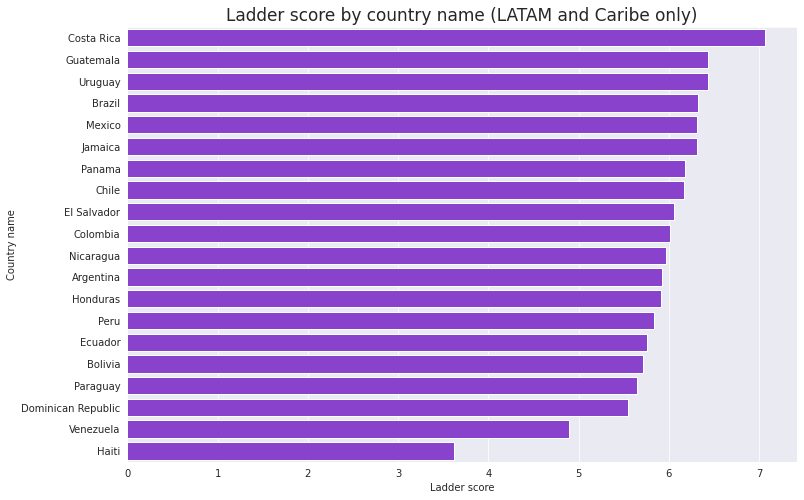

In [46]:
# Plotting bar chart for LATAM and Caribe only, for the ladder score
plt.figure(figsize = (12, 8))
ax = sns.barplot(x = 'Ladder score',
                 y = 'Country name',
                 data=latam_caribe,
                 orient='h',
                 color='blueviolet',
                 order=latam_caribe.sort_values('Ladder score', ascending=False)['Country name'])
ax.set_title('Ladder score by country name (LATAM and Caribe only)', fontsize=17);

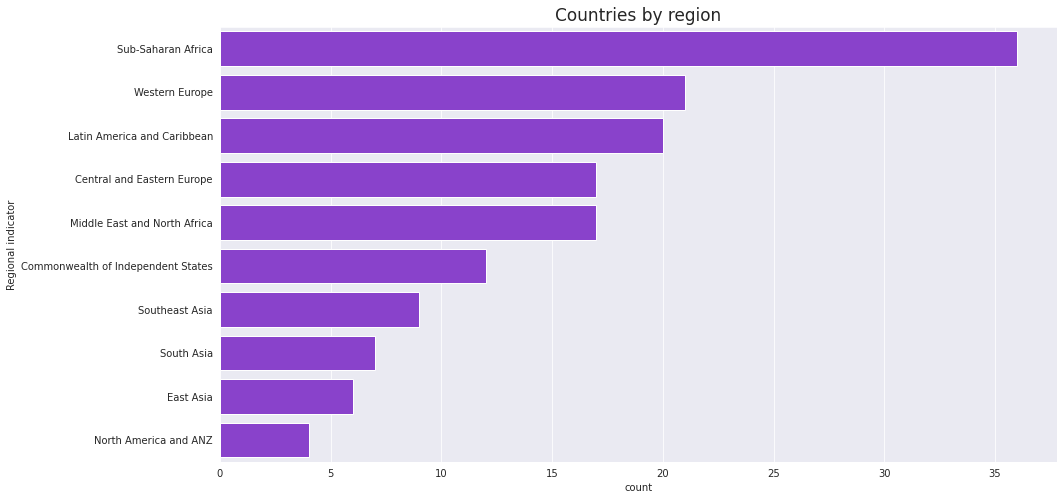

In [54]:
# Number of countries per region
plt.figure(figsize=(15,8))
ax = sns.countplot(y = 'Regional indicator',
                   data = df,
                   color = 'blueviolet',
                   order = df['Regional indicator'].value_counts().index)
ax.set_title('Countries by region', fontsize=17);

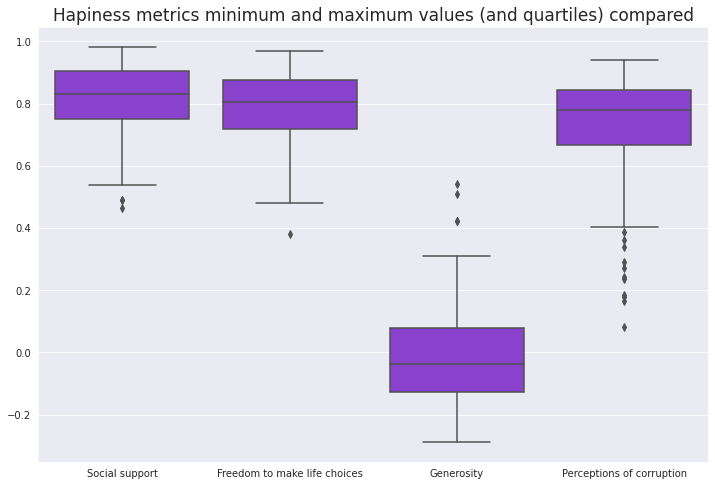

In [60]:
# Boxplotting all happiness metrics by region

happiness_metrics = ['Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

plt.figure(figsize = (12, 8))
ax = sns.boxplot(data = df.loc[:, happiness_metrics], 
                 orient = 'v',
                 color = 'blueviolet')
ax.set_title('Hapiness metrics minimum and maximum values (and quartiles) compared', 
             fontsize = 17);

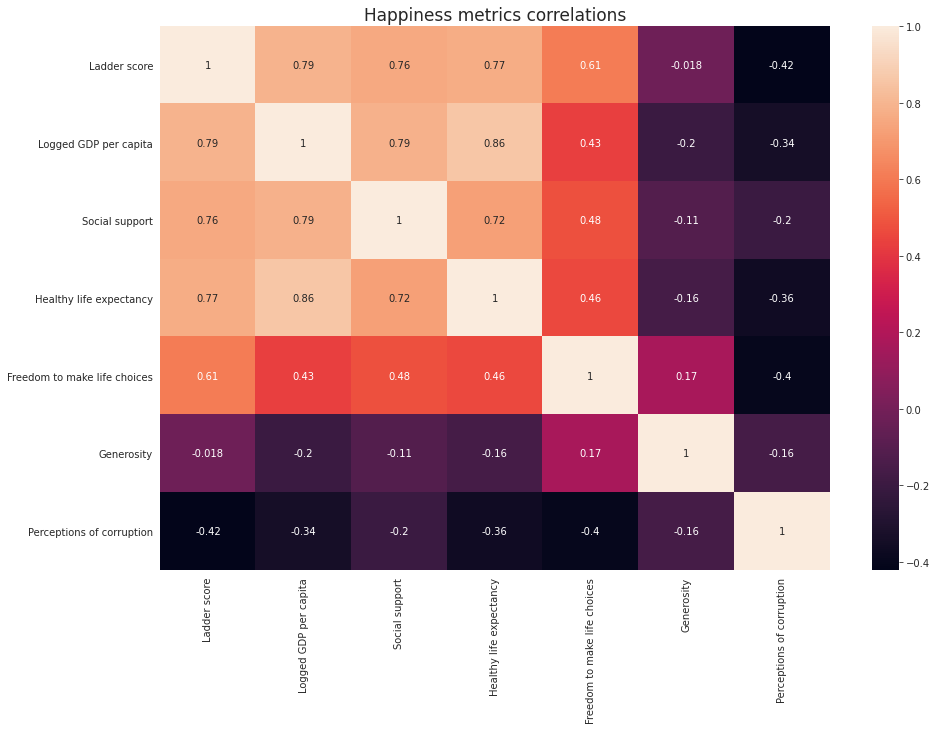

In [61]:
# Happiness metrics correlations using a heatmap
plt.figure(figsize = (15, 10))
ax = sns.heatmap(df.corr(), annot=True)
ax.set_title('Happiness metrics correlations', fontsize = 17);

In [62]:
fig = px.choropleth(df, 
                    locations='Country name', 
                    locationmode='country names',
                    color='Ladder score',
                    title='Happiness across the World')
fig.show()